In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import random
random.seed(10)
import data_pre as data_pre

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
data = pd.read_csv("C:/Santhosh/AIML/Github/Machine-Learning/Costa Rican Household Poverty Level Prediction/data/train.csv")

In [4]:
del_cols = ['idhogar', 'Id','dependency','tamhog','r4t3', 'tamviv', 'r4h1', 'hogar_total','r4h2', 'r4h3', 'r4m1', 'r4m2','r4m3', 'hogar_nin', 'hogar_adul', 'hogar_mayor', 'SQBescolari','SQBage','SQBhogar_total','SQBedjefe','SQBhogar_nin','SQBovercrowding','SQBdependency','SQBmeaned','agesq']

In [5]:
data_pre.drop_columns(data,del_cols)
data_pre.replce_na(data)
data_pre.get_cat_cols(data)
data_pre.encode_data(data)
train, test = data_pre.train_test_split(data)

In [6]:
X_train = train.drop(['Target'], axis =1)
Y_train = train['Target']
X_test = test.drop(['Target'], axis =1)
Y_test = test['Target']

In [10]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

Using TensorFlow backend.


In [7]:
from tensorflow import keras
from tensorflow.keras import layers
# from tensorflow.keras.metrics import f1
model = keras.Sequential()

c:\users\katta\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\katta\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\katta\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\katta\appd

In [8]:
model.add(layers.Dense(117, input_shape=(117,)))
model.add(layers.Activation('relu'))
model.add(layers.Dense(100))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(15))
model.add(layers.Activation('relu'))
model.add(layers.Dense(5))
model.add(layers.Activation('softmax')) 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
history = model.fit(X_train, Y_train, epochs=100,
           verbose=2,
           validation_data=(X_test, Y_test))

Train on 7646 samples, validate on 1911 samples
Epoch 1/100
7646/7646 - 1s - loss: 68.6355 - acc: 0.5862 - val_loss: 1.1001 - val_acc: 0.6473
Epoch 2/100
7646/7646 - 0s - loss: 4.2092 - acc: 0.6402 - val_loss: 1.0252 - val_acc: 0.6510
Epoch 3/100
7646/7646 - 0s - loss: 2.5681 - acc: 0.6504 - val_loss: 1.0012 - val_acc: 0.6473
Epoch 4/100
7646/7646 - 0s - loss: 1.4584 - acc: 0.6572 - val_loss: 0.9555 - val_acc: 0.6504
Epoch 5/100
7646/7646 - 0s - loss: 2.3859 - acc: 0.6549 - val_loss: 0.9308 - val_acc: 0.6531
Epoch 6/100
7646/7646 - 1s - loss: 1.1321 - acc: 0.6660 - val_loss: 0.9193 - val_acc: 0.6578
Epoch 7/100
7646/7646 - 1s - loss: 1.0426 - acc: 0.6705 - val_loss: 0.9062 - val_acc: 0.6578
Epoch 8/100
7646/7646 - 1s - loss: 1.1348 - acc: 0.6734 - val_loss: 0.8890 - val_acc: 0.6656
Epoch 9/100
7646/7646 - 1s - loss: 1.3745 - acc: 0.6801 - val_loss: 0.8839 - val_acc: 0.6672
Epoch 10/100
7646/7646 - 1s - loss: 1.0838 - acc: 0.6847 - val_loss: 0.8734 - val_acc: 0.6667
Epoch 11/100
7646/76

Epoch 88/100
7646/7646 - 0s - loss: 0.3287 - acc: 0.8943 - val_loss: 0.8992 - val_acc: 0.7902
Epoch 89/100
7646/7646 - 0s - loss: 0.3296 - acc: 0.8943 - val_loss: 0.8365 - val_acc: 0.7881
Epoch 90/100
7646/7646 - 1s - loss: 0.3354 - acc: 0.8892 - val_loss: 0.8498 - val_acc: 0.7975
Epoch 91/100
7646/7646 - 1s - loss: 0.3253 - acc: 0.8925 - val_loss: 0.8832 - val_acc: 0.7917
Epoch 92/100
7646/7646 - 1s - loss: 0.3766 - acc: 0.8900 - val_loss: 0.8230 - val_acc: 0.7912
Epoch 93/100
7646/7646 - 1s - loss: 0.5317 - acc: 0.8897 - val_loss: 0.8502 - val_acc: 0.7870
Epoch 94/100
7646/7646 - 1s - loss: 0.9749 - acc: 0.8926 - val_loss: 0.8998 - val_acc: 0.7760
Epoch 95/100
7646/7646 - 1s - loss: 0.3246 - acc: 0.8931 - val_loss: 0.9139 - val_acc: 0.7771
Epoch 96/100
7646/7646 - 1s - loss: 0.3566 - acc: 0.8903 - val_loss: 0.8514 - val_acc: 0.7891
Epoch 97/100
7646/7646 - 0s - loss: 0.5921 - acc: 0.8956 - val_loss: 0.8214 - val_acc: 0.7959
Epoch 98/100
7646/7646 - 0s - loss: 0.3634 - acc: 0.8973 - v

In [16]:
hist = pd.DataFrame(history.history)
hist.tail()

,loss,acc,val_loss,val_acc
95,0.356606,0.890269,0.851400,0.789116
96,0.592128,0.895632,0.821404,0.795918
97,0.363442,0.897332,0.937238,0.781790
98,1.022952,0.894847,0.883383,0.793825
99,0.317943,0.897463,0.851015,0.800628


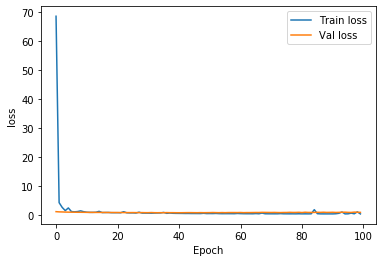

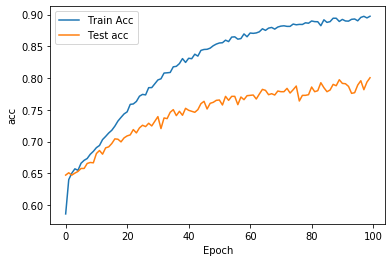

In [15]:
 def plot_history(history): 
        hist = pd.DataFrame(history.history)
        hist['epoch'] = history.epoch
        plt.figure()
        plt.xlabel('Epoch')
        plt.ylabel('loss')
        plt.plot(hist['epoch'], hist['loss'], label='Train loss')
        plt.plot(hist['epoch'], hist['val_loss'], label = 'Val loss')
        plt.legend()

        plt.figure()
        plt.xlabel('Epoch')
        plt.ylabel('acc')
        plt.plot(hist['epoch'], hist['acc'],label='Train Acc')
        plt.plot(hist['epoch'], hist['val_acc'],label = 'Test acc')
        plt.legend()
        plt.show()


plot_history(history)

In [14]:
score = model.evaluate(X_test, Y_test, batch_size=128)

1911/1911 [==============================] - 0s 31us/sample - loss: 0.8510 - acc: 0.8006
